# Testing

----

Aditya Marathe

## Imports

In [1]:
%matplotlib inline

import sys

import numpy as np

import pandas as pd

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

**Local:**

In [3]:
sys.path.insert(1, './../')

import ana
import plotting
# import labbook

**Version:**

In [4]:
print(f'Python {sys.version}\n')
print(f'NumPy {np.__version__}')

Python 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]

NumPy 1.26.4


## Loading dataset

In [5]:
ds = ana.Datasets()

Datasets | Found the following: MINI_DATA_DIR, DATA_V2_DIR, DATA_V3_DIR, REALLY_MINI_DIR, COPYMERGED_C8_DIR, COPYMERGED_C9_DIR, COPYMERGED_C10_DIR, COPYMERGED_C11_DIR, COPYMERGED_C13_DIR, COPYMERGED_C15_DIR, COPYMERGED_C16_DIR, COPYMERGED_C17_DIR, COPYMERGED_C19_DIR, COPYMERGED_C20_DIR, COPYMERGED_C21_DIR, COPYMERGED_C22_DIR


In [6]:
data = ana.NOvAData.init_from_copymerge_h5(
    h5dirs=[
        ds.COPYMERGED_C8_DIR,  # type: ignore
        ds.COPYMERGED_C9_DIR  # type: ignore
    ]
)

NOvAData | Loading tables from copymerged HDF5 files...
NOvAData | Loaded table from copymerged HDF5 files (1 / 2).
NOvAData | Loaded table from copymerged HDF5 files (2 / 2).
NOvAData | Initialised NOvAData(features=55, events=295_499).


In [7]:
data.fill_ana_flags(inplace=True)
data.fill_categorical(inplace=True)

NOvAData | Filled MC truth flags.
NOvAData | Filled categorical data.


In [8]:
cuts = ana.Cuts.init_nova_cuts()

In [9]:
# Cuts
data.table = cuts.apply_all_cuts(data.table, except_=['Containment'])

Cuts     | Applied 'Detector Quality' cut (295_499 -> 246_840 events).
Cuts     | Applied 'Data Quality' cut (246_840 -> 246_835 events).
Cuts     | Applied 'CVN PID Score' cut (246_835 -> 55_620 events).
Cuts     | Applied 'Cosmic Rej.' cut (55_620 -> 53_742 events).
Cuts     | Applied 'Veto' cut (53_742 -> 51_079 events).


In [10]:
# Transforms
data.apply_transforms(['tf_280224_encode_event_type'], inplace=True)

NOvAData | Applied a transform which encodes the event type as 1 for (A-)NuMu CC and 0 for background.


In [11]:
data.table.head()

rec.energy.numu.E  \
run   subrun cycle batch evt subevt                      
14746 27     0     0     1   1                4.073382   
                         12  1                1.552510   
                         15  1                1.861829   
                         18  1                1.956901   
                         25  1                1.883968   

                                     rec.energy.numu.calccE  \
run   subrun cycle batch evt subevt                           
14746 27     0     0     1   1                     5.044105   
                         12  1                     1.682602   
                         15  1                     1.974318   
                         18  1                     2.069306   
                         25  1                     2.052043   

                                     rec.energy.numu.hadcalE  \
run   subrun cycle batch evt subevt                            
14746 27     0     0     1   1                      0.157698   
                         12  1                      0.201295   
                         15  1                      0.232267   
                         18  1                      0.339767   
                         25  1                      0.069560   

                                     rec.energy.numu.hadtrkE  \
run   subrun cycle batch evt subevt                            
14746 27     0     0     1   1                      0.000000   
                         12  1                      0.030959   
                         15  1                      0.115760   
                         18  1                      0.134406   
                         25  1                      0.105667   

                                     rec.energy.numu.lstmmuon  \
run   subrun cycle batch evt subevt                             
14746 27     0     0     1   1                       3.999807   
                         12  1                       1.087332   
                         15  1                       1.165287   
                         18  1                       0.959632   
                         25  1                       1.528021   

                                     rec.energy.numu.lstmnu  \
run   subrun cycle batch evt subevt                           
14746 27     0     0     1   1                     4.369726   
                         12  1                     1.788674   
                         15  1                     1.902309   
                         18  1                     1.914035   
                         25  1                     1.895483   

                                     rec.energy.numu.regcvnhadE  \
run   subrun cycle batch evt subevt                               
14746 27     0     0     1   1                         0.051418   
                         12  1                         0.486985   
                         15  1                         0.717779   
                         18  1                         1.063740   
                         25  1                         0.330356   

                                     rec.energy.numu.trkccE  \
run   subrun cycle batch evt subevt                           
14746 27     0     0     1   1                     4.073382   
                         12  1                     1.552510   
                         15  1                     1.861829   
                         18  1                     1.956901   
                         25  1                     1.883968   

                                     rec.energy.numu.recomuonE  \
run   subrun cycle batch evt subevt                              
14746 27     0     0     1   1                        3.746641   
                         12  1                        1.076423   
                         15  1                        1.153833   
                         18  1                        0.996218   
                         25  1                        1.522115   

                 

## Data exploration...

In [12]:
# data.table[
#     [
#         # 'rec.trk.kalman.idxlongest',
#         'rec.trk.kalman.tracks.len',
#         'rec.trk.kalman.tracks.rempid'
#     ]
# ].head(10)

In [13]:
# data.table[
#     [
#         # 'rec.trk.kalman.tracks.dedxllh',
#         'rec.trk.kalman.tracks.rempid',
#         'ana.cat.event_type'
#     ]
# ][data.table['ana.cat.event_type'] == 1].head(20)

In [15]:
data.table[
    [
        # 'rec.training.cvnmaps.hitfracy',
        'ana.cat.event_type'
    ]
]

ana.cat.event_type
run   subrun cycle batch evt subevt                    
14746 27     0     0     1   1                        1
                         12  1                        1
                         15  1                        1
                         18  1                        1
                         25  1                        1
...                                                 ...
15021 2      0     0     978 1                        1
                         986 1                        1
                         991 1                        1
                         992 1                        1
                         995 1                        1

[51079 rows x 1 columns]

In [16]:
kalfwdcell_sig = data.table[data.table['ana.cat.event_type'] == 1]['rec.sel.contain.kalfwdcell'].to_numpy()
kalfwdcell_bak = data.table[data.table['ana.cat.event_type'] == 0]['rec.sel.contain.kalfwdcell'].to_numpy()

kalbakcell_sig = data.table[data.table['ana.cat.event_type'] == 1]['rec.sel.contain.kalbakcell'].to_numpy()
kalbakcell_bak = data.table[data.table['ana.cat.event_type'] == 0]['rec.sel.contain.kalbakcell'].to_numpy()

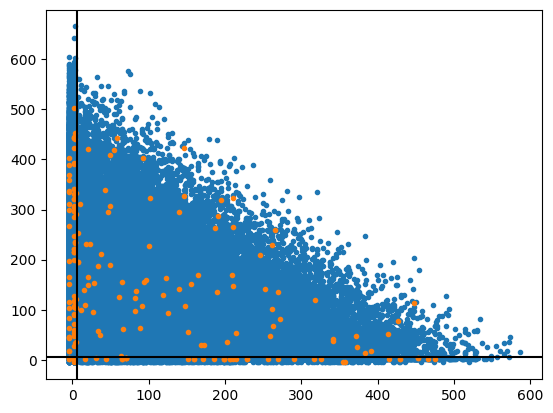

In [17]:
plt.plot(kalfwdcell_sig, kalbakcell_sig, '.')
plt.plot(kalfwdcell_bak, kalbakcell_bak, '.')
plt.axhline(6, color='k')
plt.axvline(6, color='k');

In [18]:
cosfwdcell_sig = data.table[data.table['ana.cat.event_type'] == 1]['rec.sel.contain.cosfwdcell'].to_numpy()
cosfwdcell_bak = data.table[data.table['ana.cat.event_type'] == 0]['rec.sel.contain.cosfwdcell'].to_numpy()

cosbakcell_sig = data.table[data.table['ana.cat.event_type'] == 1]['rec.sel.contain.cosbakcell'].to_numpy()
cosbakcell_bak = data.table[data.table['ana.cat.event_type'] == 0]['rec.sel.contain.cosbakcell'].to_numpy()

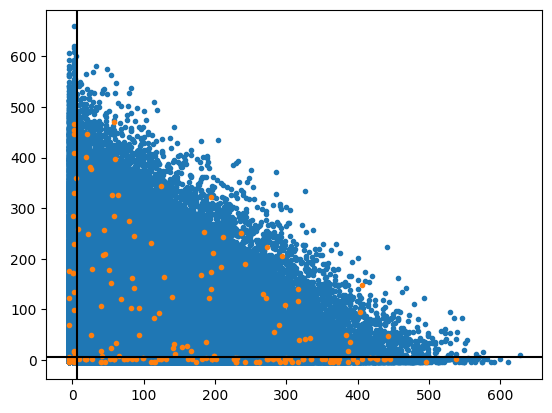

In [19]:
plt.plot(cosfwdcell_sig, cosbakcell_sig, '.')
plt.plot(cosfwdcell_bak, cosbakcell_bak, '.')
plt.axhline(5, color='k')
plt.axvline(7, color='k');

In [20]:
firstplane_sig = data.table[data.table['ana.cat.event_type'] == 1]['rec.slc.firstplane'].to_numpy()
firstplane_bak = data.table[data.table['ana.cat.event_type'] == 0]['rec.slc.firstplane'].to_numpy()

lastplane_sig = 896 - data.table[data.table['ana.cat.event_type'] == 1]['rec.slc.lastplane'].to_numpy()
lastplane_bak = 896 - data.table[data.table['ana.cat.event_type'] == 0]['rec.slc.lastplane'].to_numpy()

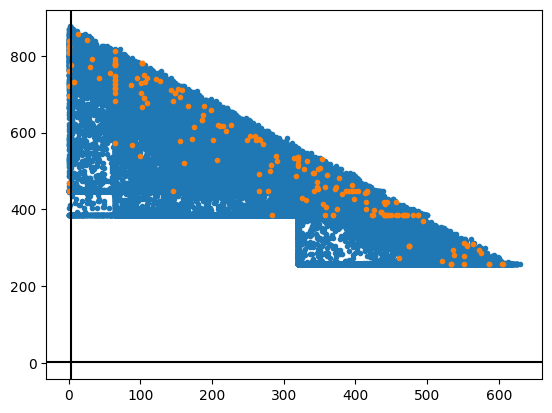

In [63]:
plt.plot(firstplane_sig, lastplane_sig, '.')
plt.plot(firstplane_bak, lastplane_bak, '.')
plt.axhline(2, color='k')
plt.axvline(3, color='k');

In [25]:
full_cut_table = cuts.apply_cut('Containment', data.table)

Cuts     | Applied 'Containment' cut (51_079 -> 24_385 events).


In [58]:
pot = np.sum(full_cut_table['rec.mc.nu.beam.potnum'])

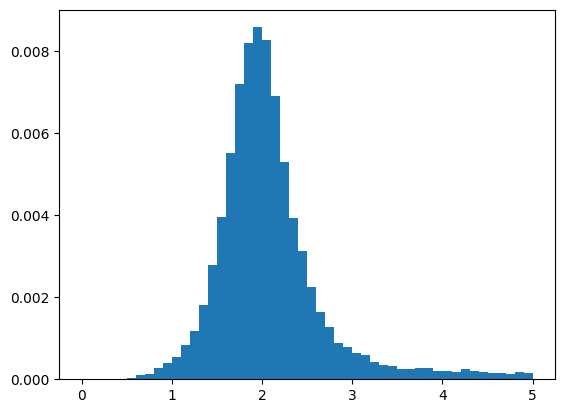

In [60]:
nova_e_bins = np.linspace(0, 5, 50 + 1)

v, _ = np.histogram(
    full_cut_table['rec.energy.numu.lstmnu'],
    bins=nova_e_bins
)

w = np.sum(v[v > 0]) / pot

plt.hist(
    nova_e_bins[:-1],
    bins=nova_e_bins,
    weights=v * w
);